### Início
- Instalar a biblioteca "yFinance"
- Escolher os ativos (ETF de S&P 500 nos EUA)
- Tratar dados faltantes (NaN = Not a Number)
- Cadeia de métodos (Method chain)
- Análise de volatilidade
- Cálculos cumulativos
- Retorno total dos ativos
- Criação de carteira histórica
- Média, max, min e desvio-padrão (mean, std)
- Escolher os ativos (ETF de Ibovespa no Brasil)

In [1]:
import yfinance as yf, pandas as pd

[*********************100%%**********************]  2 of 2 completed

c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


<Axes: xlabel='Date'>

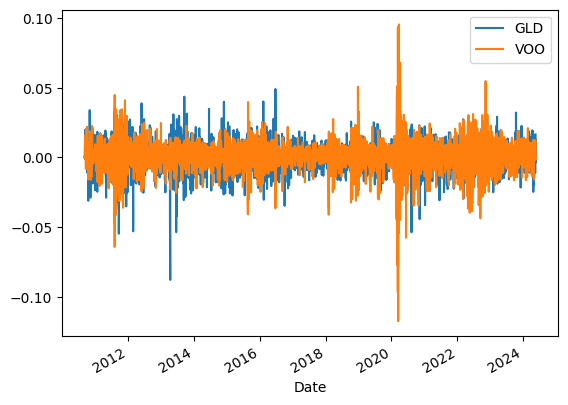

In [2]:
dados = yf.download("GLD VOO")["Adj Close"] \
    .dropna() \
    .pct_change() \
    .fillna(0)

dados.plot()

<Axes: xlabel='Date'>

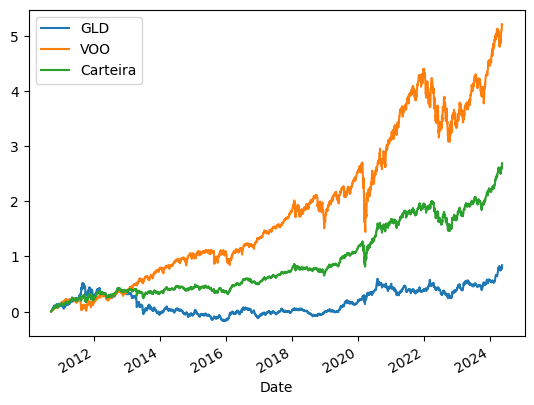

In [3]:
# R$100 x 1,1 = R$110

dados["Carteira"] = dados["GLD"]*0.5 + dados["VOO"]*0.5

retorno = ((dados + 1).cumprod() - 1)

retorno.plot()

In [4]:
# Mean = média | Não confundir com "Average"
# Desvio-padrão = standard deviation

print(dados["Carteira"].std())
print(dados["Carteira"].min())
print(dados["Carteira"].max())
print(dados["Carteira"].mean())

0.007422641863145294
-0.06830291157196522
0.07194728397660832
0.0004063257351315026


### Estatística descritiva
- Covarância
- Correlação
- .describe()

In [ ]:
brasil = yf.download("BOVA11.SA IVVB11.SA")["Adj Close"].dropna().pct_change().fillna(0) # São Paulo

In [19]:
# Matriz de covariância
# Exemplo: 10 fundos de ação, escolha 2

brasil.cov()

,BOVA11.SA,IVVB11.SA
BOVA11.SA,0.000253,0.000015
IVVB11.SA,0.000015,0.000169


In [20]:
# Matriz de correlação
# Exemplo: diversificação é racional

brasil.corr()

,BOVA11.SA,IVVB11.SA
BOVA11.SA,1.00000,0.07213
IVVB11.SA,0.07213,1.00000


In [21]:
brasil.describe()

,BOVA11.SA,IVVB11.SA
count,2467.000000,2467.000000
mean,0.000493,0.000883
std,0.015912,0.012989
min,-0.145747,-0.087316
25%,-0.007781,-0.006348
50%,0.000803,0.000615
75%,0.009302,0.007962
max,0.133951,0.102756
